<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

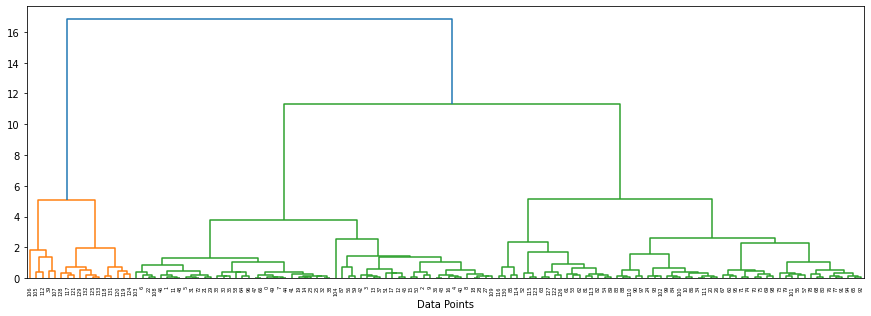

In [ ]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

Determine number of clusters by drawing a horizontal line across the longest verticle lines.

1) Divisive Clustering: We can call this the "top-down" approach. Here, we start with all of our data in one cluster. From there, we split the data into more and more clusters based on similar traits.

2) Agglomerative Clustering: You can think of this as the "bottom-up" approach. We start with each data point in its own cluster. From there, we group clusters together until we eventually have only one cluster.

In [ ]:
# Instantiate clustering
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)

AgglomerativeClustering()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


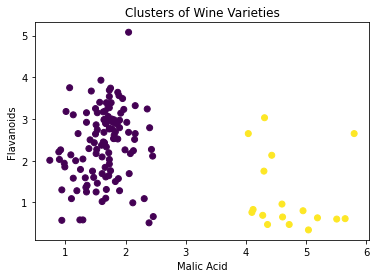

In [ ]:
# Save the cluster lables to the dataframe
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


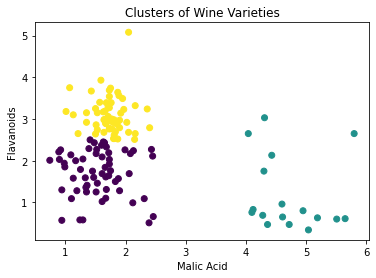

In [ ]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');